**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Visualizacao dos dados

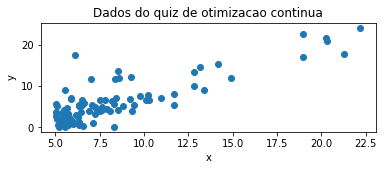

In [25]:
# dataset do Quiz de Otimizacao Continua -- troque para carregar o alegrete.csv
quiz_data = np.genfromtxt('alegrete.csv', delimiter=',')

#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados do quiz de otimizacao continua')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

EQM final: 9.62743802223498
[37.32681007249462, 23.34730161289112, 16.708596294400504, 13.551655765690944, 12.046157400488509, 11.323988093967774, 10.973405811394446, 10.799122991280909, 10.708515327473345, 10.65765117500754, 10.62569357262916, 10.602759252648335, 10.584160231233177, 10.567672624043206, 10.552241259397677, 10.537365282889656, 10.52280675276883, 10.508452428198236, 10.494248216109575, 10.480168079661476, 10.466199291660192, 10.452335440312877, 10.438573111872621, 10.424910317214854, 10.411345745551408, 10.39787841045207, 10.384507481935541, 10.371232206812497, 10.358051870886126, 10.344965781005666, 10.3319732565363, 10.31907362529515, 10.306266221605869, 10.29355038535799, 10.28092546154313, 10.268390800017338, 10.255945755370956, 10.243589686849518, 10.231321958298993, 10.219141938122737, 10.207048999244076, 10.19504251907168, 10.183121879466459, 10.171286466709168, 10.15953567146857, 10.14786888876998, 10.136285517964017, 10.124784962695704, 10.113366630873704, 10.10

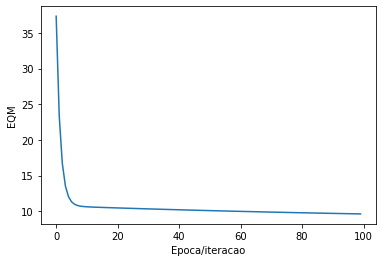

In [33]:
theta_0s, theta_1s = alegrete.fit(
    quiz_data, theta_0=0, theta_1=0, 
    alpha=0.01, num_iterations=100
)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

mse_list = [alegrete.compute_mse(th0, th1, quiz_data) for th0, th1 in zip(theta_0s, theta_1s)]
print(f"EQM final: {mse_list[-1]}")
plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: -0.24015929916514614*x + 3.8240610421703947


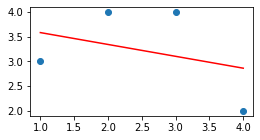

In [19]:
theta_0s, theta_1s = alegrete.fit(
    quiz_data, theta_0=0, theta_1=0, 
    alpha=0.1, num_iterations=100
)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_th1}*x + {final_th0}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])

# plota a curva de ajuste
pred = final_th1*quiz_data[:,0] + final_th0
plt.plot(quiz_data[:,0], pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

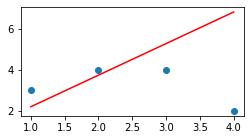

In [20]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(quiz_data[:,0], quiz_data[:,1])

# linha com os valores iniciais dos parametros
pred = theta_1s[0]*quiz_data[:,0] + theta_0s[0]
line, = ax.plot(quiz_data[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = theta_1s[i] * quiz_data[:,0] + theta_0s[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(theta_0s), interval=20, save_count=50)
HTML(ani.to_jshtml())